In [232]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as plt
from PIL import ImageFont, ImageDraw, Image
import random as rd
from IPython.display import display
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import os
from skimage import io, transform
import torchvision
import sys

In [200]:
from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import string, random
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  0.4.1
Torchvision Version:  0.2.1


In [197]:
def id_generator(size=6, chars=string.ascii_lowercase + string.digits):
    return ''.join(random.choice(chars) for _ in range(size))

In [6]:
def crop_date():
    pass

In [7]:
def crop_name():
    pass

In [204]:
number_box = {'xl': 0.06, 'xr':0.325, 'yu':0.165, 'yd':0.44}
date_box = {'xl':0.09, 'xr':0.31, 'yu':0.46, 'yd':0.5}
name_box = {'xl':0.06, 'xr':0.69, 'yu':0.563, 'yd':0.605}
fname_box = {'xl':0.06, 'xr':0.69, 'yu':0.625, 'yd':0.667}
im_size = 244

In [36]:
def draw_rectangle(image, box):
    image = image.copy()
    x, y = image.size
    draw = ImageDraw.Draw(image)
    draw.polygon([(box['xl']*x, box['yu']*y), (box['xr']*x, box['yu']*y), (box['xr']*x, box['yd']*y), (box['xl']*x, box['yd']*y)])
    return image

In [12]:
path_image = "C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\real\\"

In [79]:
im1 = Image.open(path_image+'train\\188.png')

In [165]:
im1.show()

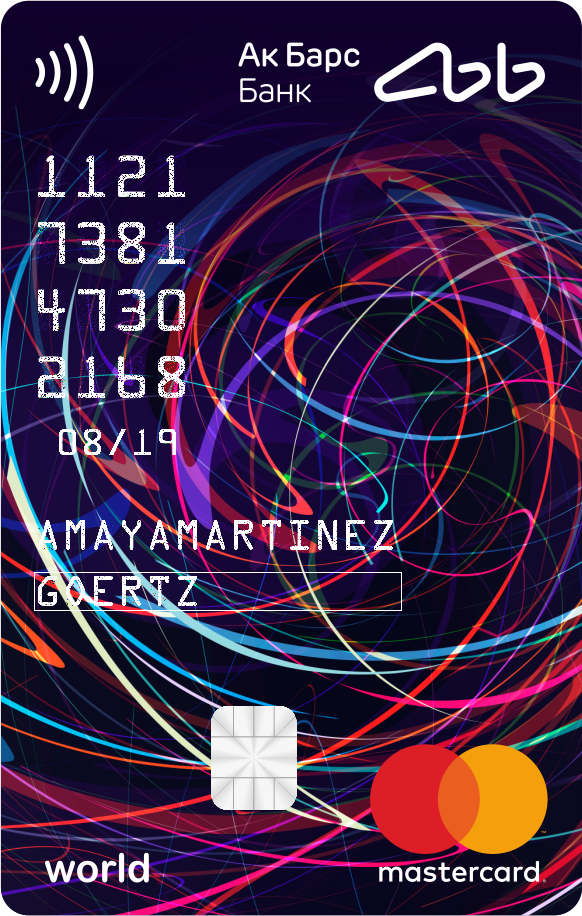

In [115]:
draw_rectangle(im1, fname_box)

In [205]:
def crop(image, cx, cy):
    image = image.copy()
    x, y = image.size
    dx, dy = int(x/cx), int(y/cy)
    cim = []
    for i in range(cy):  
        for j in range(cx):
            cim.append(image.crop((j*dx, i*dy, dx*(j+1), dy*(i+1))))
            cim[-1] = cim[-1].resize((244, 244),Image.ANTIALIAS)
#             display(cim[-1])
    return cim

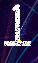

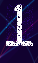

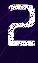

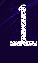

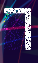

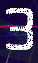

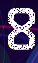

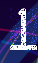

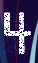

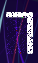

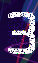

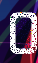

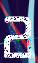

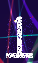

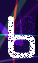

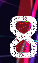

1121738147302168


In [168]:
image = im1.copy()
x, y = image.size
box = number_box
ims = crop(image.crop((int(x*box['xl']), int(y*box['yu']), int(x*box['xr']), int(y*box['yd']))), 4, 4)
print(train['card_number'][188])

In [61]:
train = pd.read_csv('C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\train.csv')

In [208]:
train.dtypes

card_number    object
date_expire    object
filename       object
first_name     object
last_name      object
dtype: object

In [65]:
train[['card_number']] = train[['card_number']].astype(object)

In [78]:
max_len = 0
name = ''
num_image = ''
for i in range(len(train)):
#     max_len = max(max_len, max(len(train['last_name'][i]), len(train['last_name'][i])))
    if len(train['first_name'][i]) > max_len:
        name = train['first_name'][i]
        max_len = len(train['first_name'][i])
        num_image = train['filename'][i]
print(max_len, name, num_image)

13 amayamartinez 188.png


In [226]:
fpath = 'C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\crreal\\'
alpabet = 'abcdefghijklmnopqrstuvwxyz0123456789'
#train folders
if 'train' not in os.listdir(fpath):
    os.mkdir(fpath+'train')
for i in range(len(alpabet)):
    if alpabet[i] not in os.listdir(fpath+'train'):
        os.mkdir(fpath+'train\\'+alpabet[i])
#test folders
if 'test' not in os.listdir(fpath):
    os.mkdir(fpath+'test')
for i in range(len(alpabet)):
    if alpabet[i] not in os.listdir(fpath+'test'):
        os.mkdir(fpath+'test\\'+alpabet[i])
        
#val folder

if 'val' not in os.listdir(fpath):
    os.mkdir(fpath+'val')
for i in range(len(alpabet)):
    if alpabet[i] not in os.listdir(fpath+'val'):
        os.mkdir(fpath+'val\\'+alpabet[i])

In [227]:
for i in range(len(train)):
    stage = ''
    if(random.random() > 0.8):
        stage = 'val\\'
    else:
        stage = 'train\\'
    print(i, stage)
    
    im = Image.open('C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\real\\train\\'+train['filename'][i])
    x, y = im.size
    numbers = crop(im.crop((int(x*number_box['xl']), int(y*number_box['yu']), 
                               int(x*number_box['xr']), int(y*number_box['yd']))), 4, 4)
    for nim in range(len(numbers)):
        numbers[nim].save(fpath+stage+str(train['card_number'][i])[nim]+'\\'+id_generator()+'.png')
        
    date = crop(im.crop((int(x*date_box['xl']), int(y*date_box['yu']), 
                           int(x*date_box['xr']), int(y*date_box['yd']))), 5, 1)
    for nim in range(len(date)):
        if(str(train['date_expire'][i])[nim] != '/'):
            date[nim].save(fpath+stage+str(train['date_expire'][i])[nim]+'\\'+id_generator()+'.png')
            
    first_name = crop(im.crop((int(x*name_box['xl']), int(y*name_box['yu']), 
                           int(x*name_box['xr']), int(y*name_box['yd']))), 13, 1)
    for nim in range(len(train['first_name'][i])):
        first_name[nim].save(fpath+stage+str(train['first_name'][i])[nim]+'\\'+id_generator()+'.png')
        
    last_name = crop(im.crop((int(x*fname_box['xl']), int(y*fname_box['yu']), 
                           int(x*fname_box['xr']), int(y*fname_box['yd']))), 13, 1)
    for nim in range(len(train['last_name'][i])):
        last_name[nim].save(fpath+stage+str(train['last_name'][i])[nim]+'\\'+id_generator()+'.png')
    

0 train\
1 train\
2 train\
3 train\
4 train\
5 train\
6 train\
7 train\
8 train\
9 train\
10 train\
11 val\
12 train\
13 train\
14 train\
15 val\
16 train\
17 train\
18 train\
19 train\
20 train\
21 train\
22 train\
23 train\
24 val\
25 train\
26 train\
27 train\
28 train\
29 train\
30 train\
31 train\
32 train\
33 train\
34 train\
35 val\
36 val\
37 train\
38 train\
39 train\
40 train\
41 train\
42 train\
43 train\
44 train\
45 train\
46 train\
47 train\
48 train\
49 train\
50 train\
51 train\
52 train\
53 train\
54 train\
55 train\
56 train\
57 train\
58 train\
59 train\
60 train\
61 train\
62 train\
63 train\
64 train\
65 train\
66 train\
67 train\
68 val\
69 train\
70 train\
71 train\
72 train\
73 train\
74 val\
75 train\
76 val\
77 train\
78 train\
79 val\
80 train\
81 train\
82 train\
83 val\
84 train\
85 val\
86 train\
87 train\
88 train\
89 train\
90 train\
91 train\
92 train\
93 train\
94 train\
95 train\
96 train\
97 val\
98 train\
99 train\
100 train\
101 train\
102 train\
1

784 train\
785 val\
786 train\
787 train\
788 val\
789 train\
790 train\
791 train\
792 val\
793 train\
794 train\
795 train\
796 val\
797 train\
798 train\
799 train\
800 train\
801 train\
802 train\
803 train\
804 train\
805 val\
806 train\
807 train\
808 train\
809 train\
810 train\
811 train\
812 train\
813 val\
814 val\
815 train\
816 train\
817 train\
818 train\
819 train\
820 train\
821 train\
822 train\
823 train\
824 val\
825 train\
826 train\
827 val\
828 train\
829 train\
830 train\
831 train\
832 train\
833 train\
834 train\
835 train\
836 train\
837 train\
838 train\
839 train\
840 train\
841 train\
842 train\
843 train\
844 val\
845 val\
846 val\
847 train\
848 train\
849 val\
850 val\
851 train\
852 train\
853 train\
854 train\
855 train\
856 val\
857 val\
858 train\
859 train\
860 val\
861 train\
862 train\
863 train\
864 train\
865 train\
866 train\
867 train\
868 train\
869 train\
870 train\
871 train\
872 val\
873 train\
874 train\
875 train\
876 train\
877 train\
87

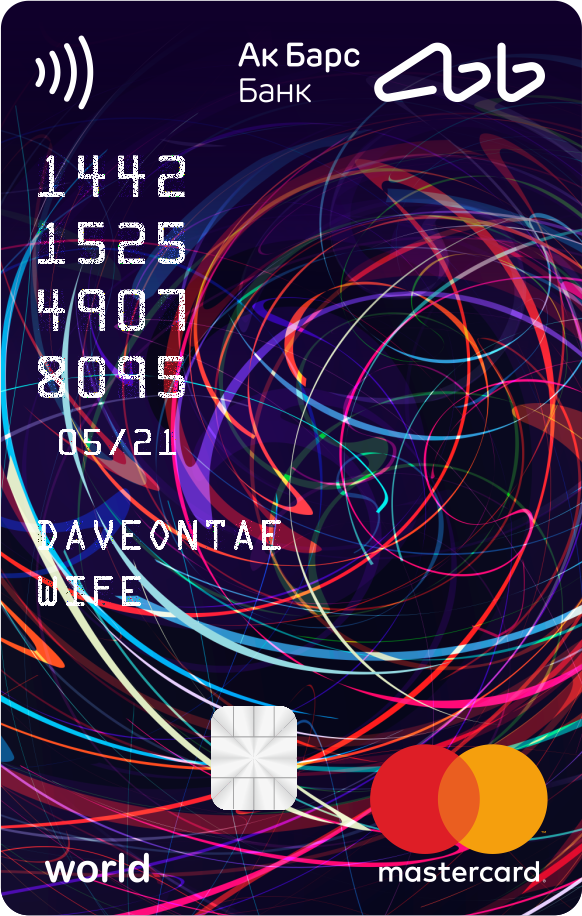

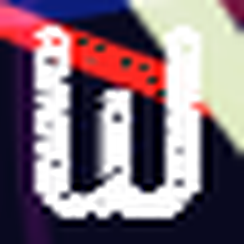

w


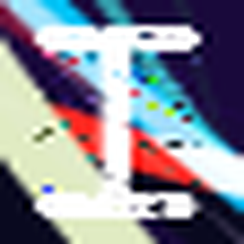

i


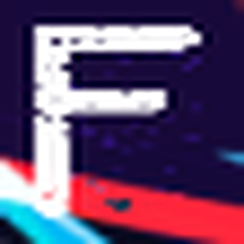

f


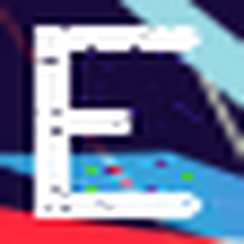

e


In [216]:
im = Image.open('C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\real\\train\\test\\'+train['filename'][0])
display(im)
x, y = im.size
last_name = crop(im.crop((int(x*fname_box['xl']), int(y*fname_box['yu']), 
                           int(x*fname_box['xr']), int(y*fname_box['yd']))), 13, 1)
for nim in range(len(train['last_name'][0])):
#     numbers[nim].save(fpath+'train\\'+str(train['card_number'][0])[nim]+'\\'+id_generator()+'.png')
    display(last_name[nim])
    print(train['last_name'][0][nim])

In [243]:
def find_coeffs(pa, pb):
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = np.matrix(matrix, dtype=np.float)
    B = np.array(pb).reshape(8)

    res = np.dot(np.linalg.inv(A.T * A) * A.T, B)
    return np.array(res).reshape(8)

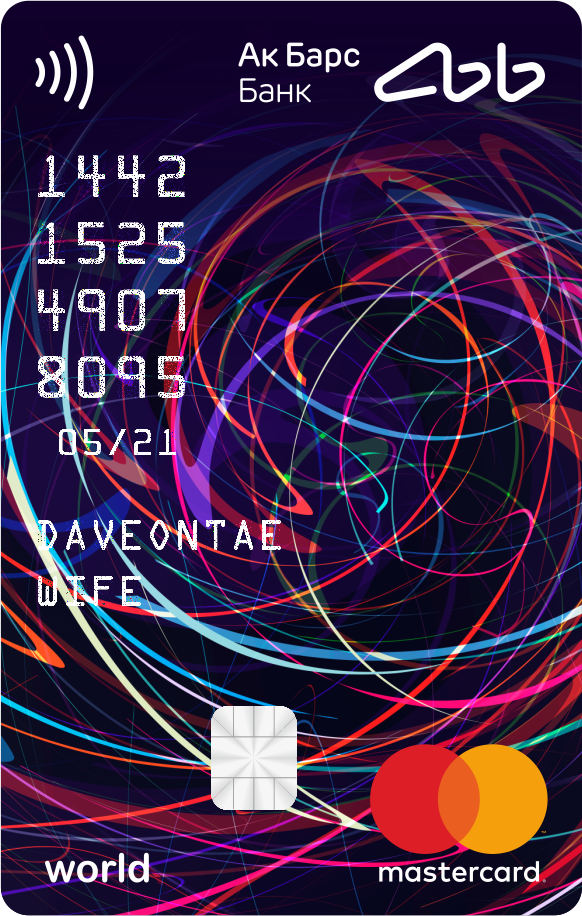

In [295]:
img = Image.open('C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\real\\train\\test\\'+train['filename'][0])
width, height = img.size
m = 0
n = 0.1
xshift = abs(m) * width
yshift = abs(n) * height
new_width = width + int(round(xshift))
new_height = height + int(round(yshift))
img = img.transform((new_width, height), Image.AFFINE,
        (1, m, -xshift if m > 0 else 0, 0, 1, 0), Image.BICUBIC)
display(img)

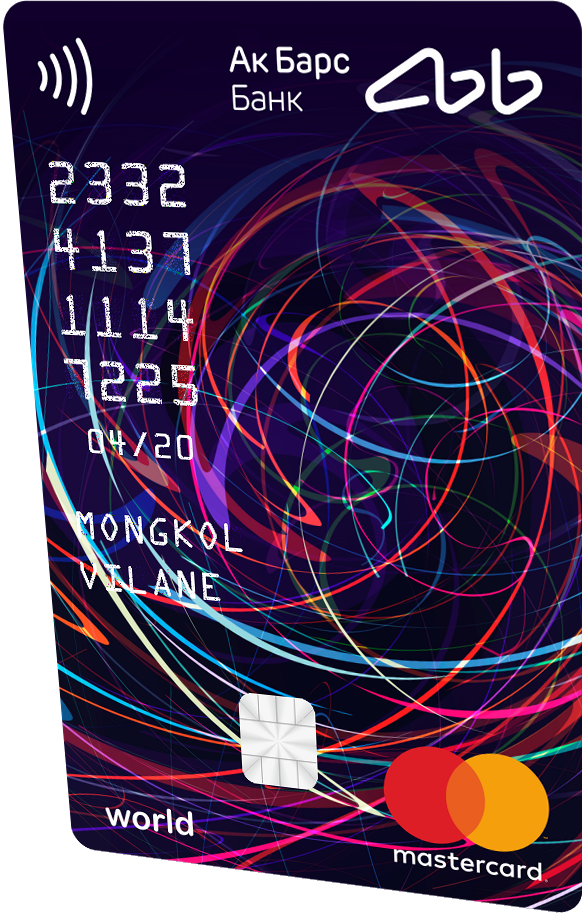

In [495]:
coeffs = find_coeffs(
        [(0, 0), (img.size[0], 0), (img.size[0], img.size[1]), (0, img.size[1])],
        [(0, 0), (img.size[0],0), (img.size[0], img.size[1]), (-100, img.size[1]+100)])

display(img.transform((width, height), Image.PERSPECTIVE, coeffs, Image.BICUBIC))

In [310]:
rimage_path = 'C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\random images'
background_names = os.listdir(rimage_path)

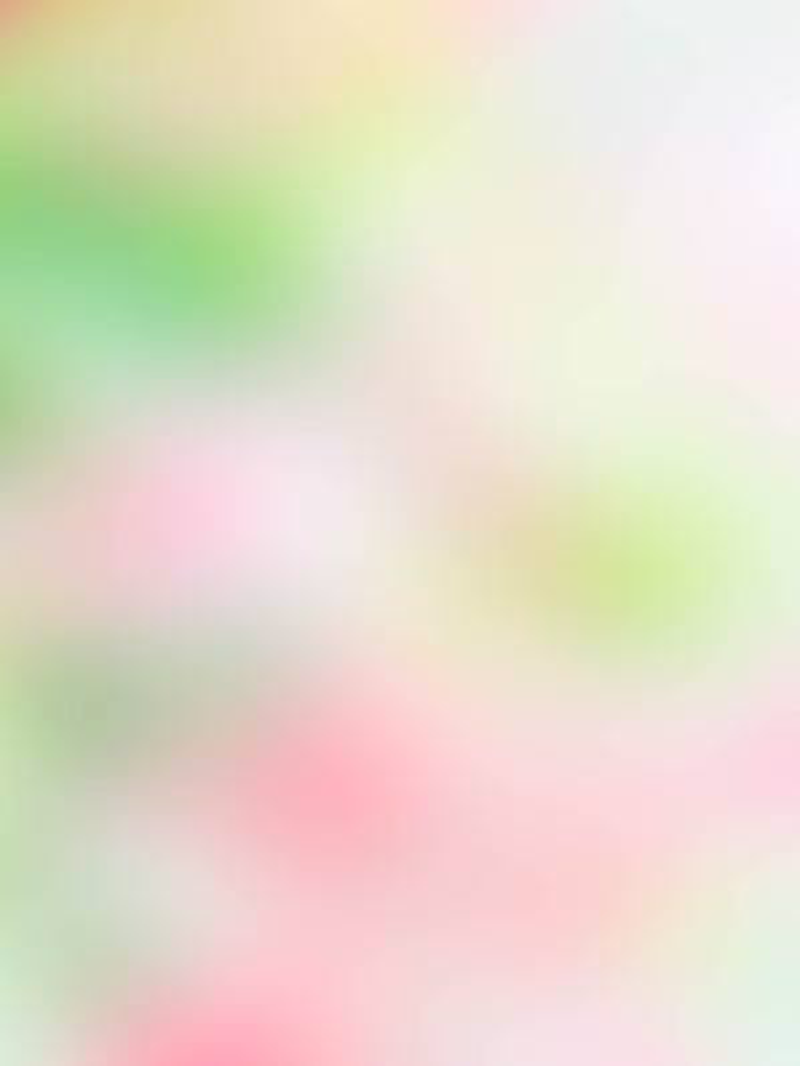

In [549]:
img = Image.open('C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\real\\train\\test\\'+train['filename'][1])
background = Image.open(rimage_path + '\\' + background_names[random.randint(0, len(background_names))])
background = background.resize((800, 1066), Image.ANTIALIAS)
# background.paste(img.transform((width, height), Image.PERSPECTIVE, coeffs, Image.BICUBIC), mask=img.transform((width, height), Image.PERSPECTIVE, coeffs, Image.BICUBIC))
display(background)

In [561]:
def create_random_pasted_image(img, background):
    img = img.copy()
    img_size = img.size
    background = background.copy()
    points = []
    for i in range(4):
        points.append([random.randint(0, 225), random.randint(0, 300)])
    coeffs = find_coeffs(
    [(0, 0), (img.size[0], 0), (img.size[0], img.size[1]), (0, img.size[1])],
    [(-points[0][0], -points[0][1]), (img.size[0]+points[1][0], -points[1][1]), 
     (img.size[0]+points[2][0], img.size[1]+points[2][1]), (-points[3][0], img.size[1]+points[3][1])])
    print(points)
    points[1][0] += img.size[0]
    points[2][0] += img.size[0]
    points[2][1] += img.size[1]
    points[3][1] += img.size[1]
    img = img.transform((img.size[0], img.size[1]), Image.PERSPECTIVE, coeffs, Image.BICUBIC)
    background.paste(img,((background.size[0] - img_size[0])//2 + random.randint(-50, 50), 
                          (background.size[1] - img_size[1])//2 + random.randint(-50, 50)), mask=img)
    return background, points

[[159, 60], [93, 90], [28, 113], [55, 200]]


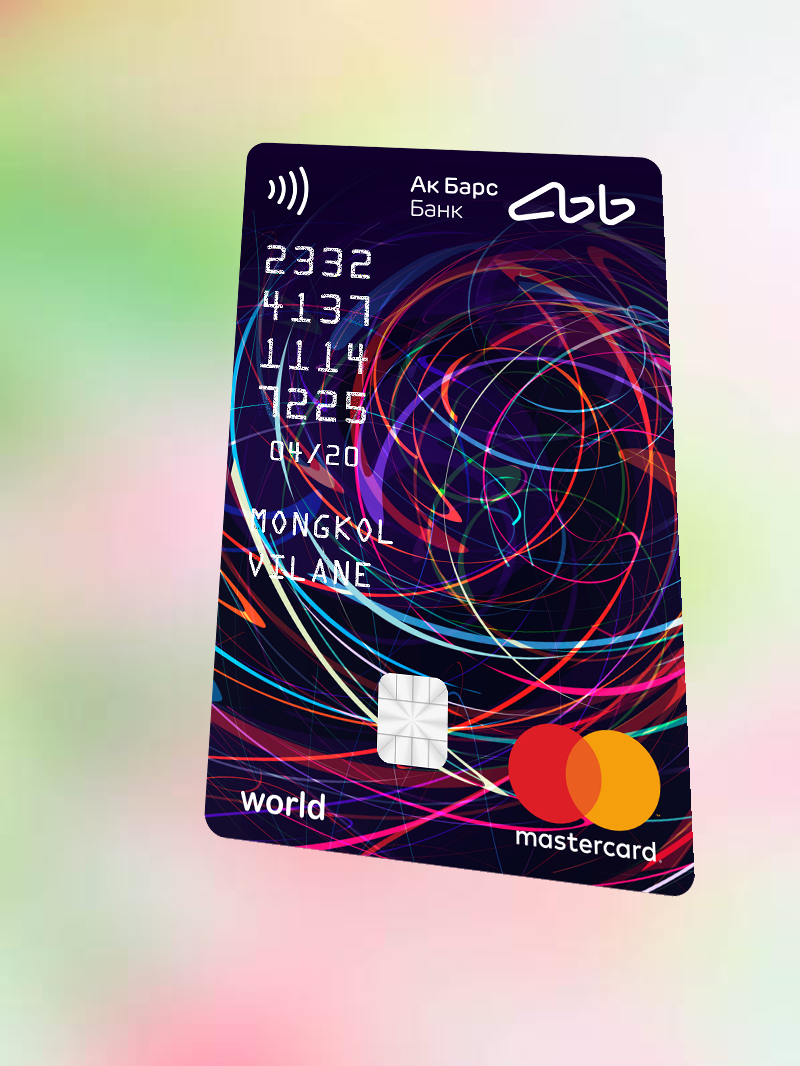

In [562]:
display(create_random_pasted_image(img, background)[0])

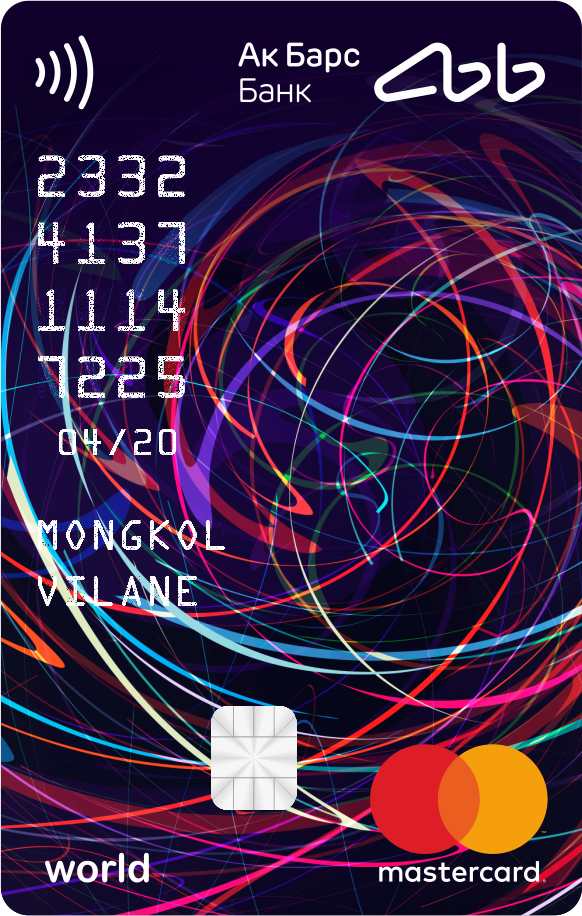

In [553]:
display(img)